### Sampling and Distributions

In [25]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Expectations and Variance

The **expectation value** of a quantity with respect to the a distribution is the weighted sum of the quantity where the weights are probabilties from the distribution. For example, for the random variable $X$:$$E_p[X] = \sum_x x\,p(x).$$

$E_p[X]$ is often just called the expectation value of the distribution. This definition is analogous to the one for the arithmetic mean of a dataset: the only difference is that we want to give more weight to more probable values.

The variance of a distribution is defined analogous to that of a dataset:$$V_p[X] = E_p[(X-E_p[X])^2]$$

For the Bernoulli distribution $p(x)=p=constant$, and you are summing it over ones as opposed to 0's, so the mean is just p. The variance is $(1-p)^2\times p +(-p)^2\times (1-p) = p(1-p)(1-p+p) = p(1-p)$.

In general, we can find this mean by obtaining a large bunch of samples from the distribution and find their arithmetic mean. The justification for this is the Law of large numbers, which we'll come to soon.

However the intuition is obvious: for a large number of samples, the frequencies will tract probabilities well, so high probability samples with roughly the same value will re-occur, and a simple arithmetic sum will capture the curves of the distribution.

### The Law of Large Numbers

Lets keep increasing the length of the sequence of coin flips n, and compute a running average $S_n$ of the coin-flip random variables, $$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i .$$ We plot this running mean, and notice that it converges to the mean of the distribution from which the random variables are plucked, ie the Bernoulli distribution with p=0.5.

In [26]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)

In [27]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_lengths = np.arange(1,10001,1)
for i in sequence_lengths:
    running_means[i-1] = np.mean(random_flips[:i])

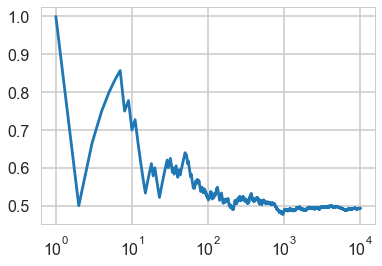

In [28]:
plt.plot(sequence_lengths, running_means);
plt.xscale('log')

This is an example of a very important theorem in statistics, the law of large numbers, which says this:

**Let $x_1,x_2,...,x_n$ be a sequence of independent, identically-distributed (IID) random variables. Suppose that $X$ has the finite mean $\mu$. Then the average of the first n of them: $$S_n = \frac{1}{n} \sum_{i=1}^{n} x_i ,$$ converges to the mean of the variables $\mu$ as $n \to \infty$: $$ S_n \to \mu \, as \, n \to \infty. $$**

The law of large numbers is what makes the **frequentist** interpretation of probability possible. For consider any event $E$ from a probability distribution with random variable Y, and consider the indicator function $I_E$ such that: 
$$\begin{eqnarray*}
I_E(y) = 1 \,&amp;&amp; if \, y \in E\\
I_E(y) = 0 \,&amp;&amp;  otherwise
\end{eqnarray*}$$
The variable $Z=I_E(Y)$ is now Bernoulli random variable with parameter and thus p = P(E). Now if we take a long sequence from $Y$ and thus $Z$, then the frequency of successes (where success means being in E) will converge by the law of large numbers to the true probability p.

Having now established something about long sequences of random variables, lets turn to samples from the population of random numbers.

### Samples from a population of coin flips

Lets redo the experiment with coin flips that we started in the previous lab. We'll establish some terminology at first. What we did there was to do a large set of replications M, in each of which we did many coin flips N. We'll call the result of each coin flip an observation, and a single replication a sample of observations. Thus the number of samples is M, and the sample size is N. These samples have been chosen from a population of size $n &gt;&gt; N$.

We show the mean over the observations, or sample mean, for a sample size of 10, with 20 replications. There are thus 20 means.

In [29]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [30]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.5,  0.4,  0.7,  0.8,  0.8,  0.6,  0.4,  0.5,  0.5,  0.4,  0.3,
        0.4,  0.2,  0.5,  0.4,  0.3,  0.7,  0.6,  0.5,  0.3])

Let us now do 200 replications, each of which has a sample size of 1000 flips, and store the 200 means for each sample sise from 1 to 1000 in sample_means.

In [31]:
sample_sizes=np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

Lets formulize what we are up to. Lets call the N random variables in the $m^{th}$ sample $x_{m1},x_{m2},...,x_{mN}$ and lets define the sample mean
$$\bar{x_m}(N) = \frac{1}{N}\, \sum_{i=1}^{N} x_{mi} $$
Now imagine the size of the sample becoming large, asymptoting to the size of an infinite or very large population (ie the sample becomes the population). Then you would expect the sample mean to approach the mean of the population distribution. This is just a restatement of the law of large numbers.

Of course, if you drew many different samples of a size N (which is not infinite), the sample means $\bar{x_1}$, $\bar{x_2}$, etc would all be a bit different from each other. But the law of large numbers intuitively indicates that as the sample size gets very large and becomes an infinite population size, these slightly differeing means would all come together and converge to the population (or distribution) mean.

To see this lets define, instead, the mean or expectation of the sample means over the set of samples or replications, at a sample size N:
$$E_{\{R\}}(\bar{x}) = \frac{1}{M} \,\sum_{m=1}^{M} \bar{x_m}(N) ,$$
where $\{R\}$ is the set of M replications, and calculate and plot this quantity.

In [32]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

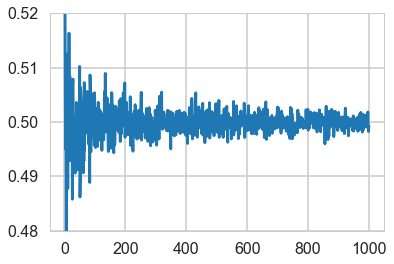

In [33]:
plt.plot(sample_sizes, mean_of_sample_means);
plt.ylim([0.480,0.520]);

Not surprisingly, the mean of the sample means converges to the distribution mean as the sample size N gets very large.

### The notion of a Sampling Distribution

In data science, we are always interested in understanding the world from incomplete data, in other words from a sample or a few samples of a population at large. Our experience with the world tells us that even if we are able to repeat an experiment or process, we will get more or less different answers the next time. If all of the answers were very different each time, we would never be able to make any predictions.

But some kind of answers differ only a little, especially as we get to larger sample sizes. So the important question then becomes one of the distribution of these quantities from sample to sample, also known as a **sampling distribution**.

Since, in the real world, we see only one sample, this distribution helps us do **inference**, or figure the uncertainty of the estimates of quantities we are interested in. If we can somehow cook up samples just somewhat different from the one we were given, we can calculate quantities of interest, such as the mean on each one of these samples. By seeing how these means vary from one sample to the other, we can say how typical the mean in the sample we were given is, and whats the uncertainty range of this quantity. This is why the mean of the sample means is an interesting quantity; it characterizes the **sampling distribution of the mean**, or the distribution of sample means.

We can see this mathematically by writing the mean or expectation value of the sample means thus:
$$E_{\{R\}}(N\,\bar{x}) = E_{\{R\}}(x_1 + x_2 + ... + x_N) = E_{\{R\}}(x_1) + E_{\{R\}}(x_2) + ... + E_{\{R\}}(x_N)$$
Now in the limit of a very large number of replications, each of the expectations in the right hand side can be replaced by the population mean using the law of large numbers! Thus:
$$\begin{eqnarray*}
E_{\{R\}}(N\,\bar{x}) &amp;=&amp; N\, \mu\\
E(\bar{x}) &amp;=&amp; \mu
\end{eqnarray*}$$
which tells us that in the limit of a large number of replications the expectation value of the sampling means converges to the population mean. This limit gives us the true sampling distribution, as opposed to what we might estimate from our finite set of replicates.

**The sampling distribution as a function of sample size**

We can see what the estimated sampling distribution of the mean looks like at different sample sizes.

In [34]:
sample_means_at_size_10=sample_means[9]
sample_means_at_size_100=sample_means[99]
sample_means_at_size_1000=sample_means[999]

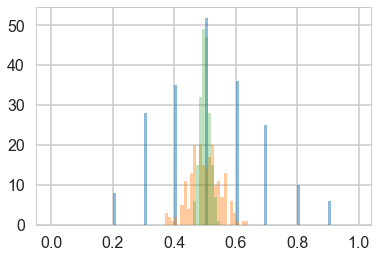

In [35]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5);
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4);
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3);

The distribution is much tighter at large sample sizes, and that you can have way low and way large means at small sample sizes. Indeed there are means as small as 0.1 at a sample size of 10, and as small as 0.3 at a sample size of 100.

Lets plot the distribution of the mean as a function of sample size.

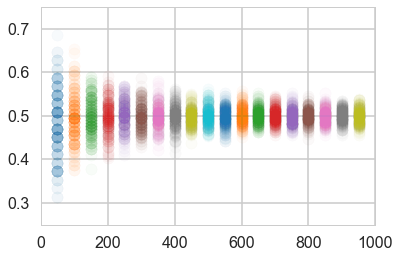

In [36]:
for i in sample_sizes:
    if i %50 ==0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);

### The kidney cancer case: higher variability at the extremes

The diagram above has a tell-tale triangular shape with high and low means, and thus much larger variability at lower sample sizes.

Consider the example of kidney cancers in various US counties from the lecture. Imagine that we have a statistical model or story for the occurence of kidney cancer. Let us think of each county as a sample in the population of kidney cancers, with the observations the per year occurence of cancer in that county. Then the low-population counties represent small size samples. The cancer rate in that county then is the sample mean of the cancer rates over multiple years in that county.

Let us plot the incidence of kidney cancer against the size of the county: (diagram taken from http://faculty.cord.edu/andersod/MostDangerousEquation.pdf , a very worth reading aticle)

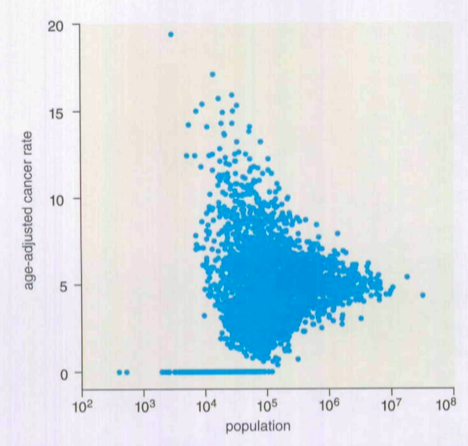

We can see the entire pattern of low and high cancer rates in some parts of the country can entirely be explained from the smallness of the sample sizes: in a county of 1000 people, one cancer is a rate too high, for example. At the left end of the graph the cancer rate varies from 20 per 100,000 to 0. And the problem, as can be seen from the graph is obviously more acute at the upper end for the above reason. On the right side of the graph, there is very little variation, with all counties at about 5 cases per 100,000 of population.

We'd obviously like to characterize mathematically the variability in the distribution of sample means as a function of the sample size.

### The variation of the sample mean

Let the underlying distribution from which we have drawn our samples have, additionally to a well defined mean $\mu$, a well defined variance $\sigma^2$. ^[The Cauchy distribution, as you know, is a well defined exception with ill defined mean and variance].

Then, as before:
$$V_{\{R\}}(N\,\bar{x}) = V_{\{R\}}(x_1 + x_2 + ... + x_N) = V_{\{R\}}(x_1) + V_{\{R\}}(x_2) + ... + V_{\{R\}}(x_N)$$
Now in the limit of a very large number of replications, each of the variances in the right hand side can be replaced by the population variance using the law of large numbers! Thus:
$$\begin{eqnarray*}
V_{\{R\}}(N\,\bar{x}) &amp;=&amp; N\, \sigma^2\\
V(\bar{x}) &amp;=&amp; \frac{\sigma^2}{N}
\end{eqnarray*}$$
This simple formula is called **De-Moivre's** formula, and explains the tell-tale triangular plots we saw above, with lots of variation at low sample sizes turning into a tight distribution at large sample size(N).

The square root of $V$, or the standard deviation of the sampling distribution of the mean (in other words, the distribution of sample means) is also called the **Standard Error**.

We can obtain the standard deviation of the sampling distribution of the mean at different sample sizes and plot it against the sample size, to confirm the $1/\sqrt(N)$ behaviour.

In [37]:
std_of_sample_means_1000 = [np.std(means) for means in sample_means]

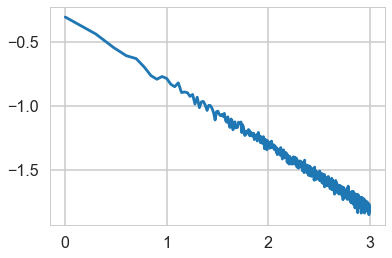

In [38]:
plt.plot(np.log10(sample_sizes), np.log10(std_of_sample_means_1000));

Let us plot again the distribution of sample means at a large sample size, $N=1000$. What distribution is this?

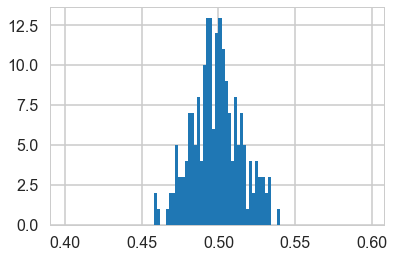

In [39]:
plt.hist(sample_means_at_size_1000, bins=np.arange(0.4,0.6,0.002));

Lets step back and try and think about what this all means. As an example, say I have a weight-watchers' study of 1000 people, whose average weight is 150 lbs with standard deviation of 30lbs. If I was to randomly choose many samples of 100 people each, the mean weights of those samples would cluster around 150lbs with a standard error of 30/$\sqrt{100}$ = 3lbs. Now if i gave you a different sample of 100 people with an average weight of 170lbs, this weight would be more than 6 standard errors beyond the population mean, ^[this example is motivated by the crazy bus example in Charles Whelan's excellent Naked Statistics Book] and would thus be very unlikely to be from the weight watchers group.

### The Gaussian Distribution

We saw in the last section that the sampling distribution of the mean itself has a mean $\mu$ and variance $\frac{\sigma^2}{N}$. This distribution is called the **Gaussian** or **Normal Distribution**, and is probably the most important distribution in all of statistics.

The probability density of the normal distribution is given as:
$$ N(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}} e^{ -\frac{(x-\mu)^2}{2s^2} } .$$
The expected value of the Gaussian distribution is $E[X]=\mu$ and the variance is $Var[X]=s^2$.

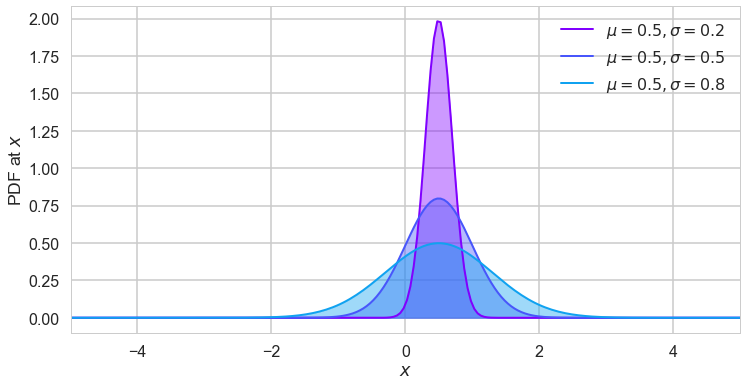

In [48]:
norm =  sp.stats.norm
x = np.linspace(-5,5, num=200)
ys = [i+x+(i*x)**2 for i in range(10)]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

fig = plt.figure(figsize=(12,6))
for mu, sigma, c in zip([0.5]*3, [0.2, 0.5, 0.8], colors):
    plt.plot(x, norm.pdf(x, mu, sigma), lw=2, 
             c=c, label = r"$\mu = {0:.1f}, \sigma={1:.1f}$".format(mu, sigma))
    plt.fill_between(x, norm.pdf(x, mu, sigma), color=c, alpha = .4)
    
    
plt.xlim([-5,5])
plt.legend(loc=0)
plt.ylabel("PDF at $x$")
plt.xlabel("$x$")

In [24]:
zip?